# Brief Introduction to the Problem:
Baseball, often referred to as America’s pastime, is the quintessential American sport, with a rich history and tradition of uniting communities. 

Baseball is also regarded as one of, if not the most, analytics driven sport. Because of the nature of the sport as having discrete events, baseball is a very analytic rich sport. From exact metrics about play outcomes to distinct statistics about location and velocities of pitches, each play in baseball provides a wide range of information. Thus, utilizing all this information and creating in-depth analysis has been a key focus of the sport in order to help players improve and teams win more. This project will be focused on using a dataset with information gathered about college baseball over the 2024 season, obtained by the UT Baseball team.

## Section about UT Baseball and NCAA Division 1
Founded in 1894 at The University of Texas Austin, the Texas Longhorns Baseball team is the “winningest” NCAA Division I intercollegiate men’s baseball program of all time. The team has an all-time win–loss record of 3774–1442–32 (.722) as of the end of the 2024 season, and the Longhorns have won 6 NCAA baseball national championships.
The NCAA Division I baseball tournament is a 64-team tournament that starts in February and ends in June each year. 
Regionals: In the first round, the 64 teams are split into 16 brackets. Each is a double-elimination bracket (team isn't eliminated until they lose two games) with 4 teams.

Super regionals: The 16 winners of the regionals move on to the super regionals and are split into 8 pairings.
Men's College World Series: The 8 winners of the super regionals head to the Men's College World Series (MCWS). They are split into two double-elimination brackets, consisting of 4 teams each.
Men's College World Series Finals: In the MCWS Finals, the NCAA champion is decided between the winners of the 2 MCWS brackets.

College baseball is about much more than sports. It is a chance to develop the next generation of baseball talent, and an integral part of the economic and cultural fabric of a university and a city or state. It is an opportunity for players to develop their skills to advance to the professional level, gain scholarships to higher education, and experience the sense of camaraderie from playing a team sport. College baseball games attract millions of viewers, although interest in baseball is not the same as it has been in the past, as college basketball and football takes a front seat in the college sports scene. The future of baseball is in a precarious, uncertain position and baseball teams around the country are working together to sustain their baseball teams and the relevance of baseball in American society.


## What is the machine learning problem you are trying to solve? Why does the problem matter? 
The machine learning problem we are trying to solve is the Multiclass Classification problem of deciding the kind of pitch a pitcher should throw to get their desired play result.

The start of a play in baseball, can be an opportunity or a missed chance for that team. The start can define the final outcome of the play, and even the game. Pitchers must make a split second decision on how they want to pitch their ball to get the desired outcome and help their team win in the long run, factoring in many different aspects of their game into that decision. 

The problem of how to throw a pitch to get a desired result is one that affects all baseball players, and pitchers especially. We would like to help pitchers in their decision making process. This can help amateur pitchers become better, and can be used by professional pitchers to ensure their pitch will result in their desired outcome and ultimately win for their team.


## What could the results of your predictive model be used for? 
The results of our predictive model can be used to help pitchers figure out what type of pitches they need to throw to obtain a certain outcome from this at-bat, assuming the batter swings at the pitch. This can help coaches and pitchers make decisions on what kind of pitch to throw in crucial situations of the game, and develop a very robust pitch selection strategy for games. If certain pitchers on a team are better at certain types of pitches than others, the coaches can use that knowledge to choose who to pitch based on which pitch type is needed. Also, if there is a certain match-up between a same-handedness batter, then coaches can adjust their pitch recommendation. 


## Why would we want to be able to predict the thing you’re trying to predict? 
We want to be able to predict the Play Result because we think that will help pitchers determine what type of outcome they will get from a batter swinging at this particular pitch. For pitchers, predicting Play Result based on the type of pitch they throw can give them insight into which of their pitches results in a positive outcome versus a negative outcome, and this can then help them in future games to know what type of pitch they should aim to throw. For example, it is useful for pitchers to know which pitches result in outs versus scoring plays like a home run.


## Dataset Description
The dataset describes baseball statistics from the UT baseball team over the time period of the 2024 baseball season, from January to April. It provides information on 4904 unique games, each with their own unique game_id. The dataset has information about the situation of a pitch, pitch data, hitter data, and pitcher, batter, and catcher names.


In [41]:
import pandas as pd
df = pd.read_csv("2024_combined_data (1).csv")

In [42]:
df.head()

,game_id,Date,Time,PitchNo,Inning,inning_half,PAofInning,PitchofPA,Pitcher,PitcherId,...,z0,vx0,vy0,vz0,ax0,ay0,az0,catcher,catcher_id,catcher_team
0,20240220-HighPointUniversity-1,2024-02-20,60314.0,82,3,Top,4,2,"Olsovsky, Dalton",1000251274,...,5.41,3.28,-106.58,0.58,12.91,22.07,-34.04,"Ruiz, Justin",1.000209e+09,HIG_PAN
1,20240220-HighPointUniversity-1,2024-02-20,63576.0,185,6,Top,2,3,"Glover, Lucas",1000138461,...,6.01,5.23,-118.11,-3.37,3.74,26.71,-27.88,"Ruiz, Justin",1.000209e+09,HIG_PAN
2,20240220-HighPointUniversity-1,2024-02-20,66446.0,269,8,Top,3,1,"Carter, Noah",1000108939,...,5.52,3.08,-122.94,-1.77,-3.68,24.28,-16.89,"Grintz, Eric",6.864560e+05,HIG_PAN
3,20240220-HighPointUniversity-1,2024-02-20,64809.0,216,6,Bottom,6,1,"Welch, Collin",1000192105,...,6.23,0.38,-117.74,-0.37,-12.27,24.59,-28.63,"Church, Braxton",1.000192e+09,APP_MOU
4,20240220-HighPointUniversity-1,2024-02-20,67985.0,308,9,Bottom,4,3,"Lewis, Zach",1000127413,...,5.18,9.62,-132.57,-10.20,-8.59,32.05,-14.93,"Church, Braxton",1.000192e+09,APP_MOU


In [43]:
# Downsample to a desired size, e.g., 50,000 rows
#df = df.sample(n=50000, random_state=42)

print(df.shape)

(1513439, 77)


In [44]:
df.columns

Index(['game_id', 'Date', 'Time', 'PitchNo', 'Inning', 'inning_half',
       'PAofInning', 'PitchofPA', 'Pitcher', 'PitcherId', 'PitcherThrows',
       'PitcherTeam', 'Batter', 'BatterId', 'BatterSide', 'BatterTeam',
       'PitchCall', 'PlayResult', 'KorBB', 'OutsOnPlay', 'RunsScored', 'Balls',
       'Strikes', 'Outs', 'TaggedPitchType', 'RelSpeed', 'SpinRate',
       'SpinAxis', 'Tilt', 'InducedVertBreak', 'VertBreak', 'HorzBreak',
       'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle', 'horz_rel_angle',
       'RelHeight', 'RelSide', 'Extension', 'PlateLocHeight', 'PlateLocSide',
       'zone_time', 'EffectiveVelo', 'SpeedDrop', 'TaggedHitType', 'hit_x',
       'hit_y', 'ExitSpeed', 'Angle', 'HitSpinRate', 'hit_spin_axis',
       'Distance', 'hit_last_tracked_distance', 'hit_hang_time', 'Direction',
       'Bearing', 'hit_max_height', 'hit_contact_x', 'hit_contact_y',
       'hit_contact_z', 'position_110x', 'position_110y', 'position_110z',
       'pfxx', 'pfxz', 'x0', 'y0', 'z

# Data Cleaning
In this section, we will clean our data by removing the features we believe are irrelevant to our model.

In [45]:
df['PitcherThrows'].value_counts()
df['BatterSide'].value_counts()

# Pitcher Throws: R, L S

R            971742
L            541647
Undefined        50
Name: BatterSide, dtype: int64

In [46]:
# Not sure what this is: 'x0', 'y0', 'z0', 'vx0', 'vy0', 'vz0', 'ax0', 'ay0', 'az0', 
cols_to_drop = ['game_id', 'Date', 'Time', 'Batter', 'BatterId', 'BatterTeam', 'TaggedHitType', 'hit_x',
                'hit_y', 'ExitSpeed', 'Angle', 'HitSpinRate', 'hit_spin_axis',
                'Distance', 'hit_last_tracked_distance', 'hit_hang_time', 'Direction',
                'Bearing', 'hit_max_height', 'hit_contact_x', 'hit_contact_y',
                'hit_contact_z','PitcherTeam','Pitcher', 'PitcherId', 'KorBB',
                'catcher', 'catcher_id', 'catcher_team']

df = df.drop(cols_to_drop,axis=1)

In [47]:
df.head()

,PitchNo,Inning,inning_half,PAofInning,PitchofPA,PitcherThrows,BatterSide,PitchCall,PlayResult,OutsOnPlay,...,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
0,82,3,Top,4,2,R,R,StrikeCalled,Undefined,0,...,-1.66,-2.00,50.0,5.41,3.28,-106.58,0.58,12.91,22.07,-34.04
1,185,6,Top,2,3,R,R,StrikeCalled,Strikeout,0,...,3.10,-1.87,50.0,6.01,5.23,-118.11,-3.37,3.74,26.71,-27.88
2,269,8,Top,3,1,R,R,HitByPitch,Undefined,0,...,9.98,-2.41,50.0,5.52,3.08,-122.94,-1.77,-3.68,24.28,-16.89
3,216,6,Bottom,6,1,R,L,BallCalled,Undefined,0,...,2.55,-1.17,50.0,6.23,0.38,-117.74,-0.37,-12.27,24.59,-28.63
4,308,9,Bottom,4,3,R,R,BallCalled,Undefined,0,...,9.83,-1.23,50.0,5.18,9.62,-132.57,-10.20,-8.59,32.05,-14.93


In [48]:
df['PlayResult'].value_counts()

Undefined         1128864
Out                146365
Strikeout           78363
Single              60293
Walk                44806
Double              17877
HomeRun             11520
Sacrifice            7748
FieldersChoice       6756
Error                6375
StolenBase           1980
Triple               1883
CaughtStealing        602
SIngle                  4
error                   2
homerun                 1
Name: PlayResult, dtype: int64

In [49]:
# take care of single
df['PlayResult'] = df['PlayResult'].str.title()
# take care of homerun

In [50]:
df['PlayResult'].value_counts()

Undefined         1128864
Out                146365
Strikeout           78363
Single              60297
Walk                44806
Double              17877
Homerun             11521
Sacrifice            7748
Fielderschoice       6756
Error                6377
Stolenbase           1980
Triple               1883
Caughtstealing        602
Name: PlayResult, dtype: int64

In [51]:
df = df[df['PlayResult'].isin(['Out', 'Single', 'Double', 'Triple', 'Homerun'])]

In [52]:
df['PlayResult'].value_counts()

Out        146365
Single      60297
Double      17877
Homerun     11521
Triple       1883
Name: PlayResult, dtype: int64

In [53]:
df.describe()

,PitchNo,Inning,PAofInning,PitchofPA,OutsOnPlay,RunsScored,Balls,Strikes,Outs,RelSpeed,...,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,236633.000000,...,236633.000000,236633.000000,236633.0,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000
mean,155.472458,4.784797,3.130846,3.285909,0.648908,0.221419,1.086718,1.036958,0.975355,85.173191,...,5.410697,-0.698182,50.0,5.593194,2.341157,-123.517539,-3.020850,-3.101841,25.955383,-23.195081
std,93.301664,2.525452,1.965054,1.794471,0.532081,0.572583,1.011131,0.818237,0.821488,5.760423,...,4.727797,1.563894,0.0,0.498850,5.104889,8.339524,2.740909,10.427141,4.112026,7.675004
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.430000,...,-25.180000,-8.460000,50.0,0.640000,-17.360000,-148.250000,-13.880000,-35.560000,4.470000,-74.600000
25%,78.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.910000,...,2.110000,-1.750000,50.0,5.330000,-1.130000,-130.020000,-4.950000,-12.030000,22.960000,-29.200000
50%,150.000000,5.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,86.190000,...,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.670000,26.010000,-22.480000
75%,228.000000,7.000000,4.000000,5.000000,1.000000,0.000000,2.000000,2.000000,2.000000,89.670000,...,9.200000,0.520000,50.0,5.910000,5.960000,-117.370000,-1.200000,5.530000,28.910000,-16.840000
max,538.000000,17.000000,21.000000,17.000000,3.000000,4.000000,4.000000,3.000000,2.000000,102.080000,...,31.680000,7.370000,50.0,8.920000,17.260000,-60.190000,26.400000,30.950000,48.790000,24.080000


In [54]:
df.columns

Index(['PitchNo', 'Inning', 'inning_half', 'PAofInning', 'PitchofPA',
       'PitcherThrows', 'BatterSide', 'PitchCall', 'PlayResult', 'OutsOnPlay',
       'RunsScored', 'Balls', 'Strikes', 'Outs', 'TaggedPitchType', 'RelSpeed',
       'SpinRate', 'SpinAxis', 'Tilt', 'InducedVertBreak', 'VertBreak',
       'HorzBreak', 'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle',
       'horz_rel_angle', 'RelHeight', 'RelSide', 'Extension', 'PlateLocHeight',
       'PlateLocSide', 'zone_time', 'EffectiveVelo', 'SpeedDrop',
       'position_110x', 'position_110y', 'position_110z', 'pfxx', 'pfxz', 'x0',
       'y0', 'z0', 'vx0', 'vy0', 'vz0', 'ax0', 'ay0', 'az0'],
      dtype='object')

In [55]:
df.iloc[:,:10].describe(include="all")

,PitchNo,Inning,inning_half,PAofInning,PitchofPA,PitcherThrows,BatterSide,PitchCall,PlayResult,OutsOnPlay
count,237943.000000,237943.000000,237943,237943.000000,237943.000000,237943,237943,237943,237943,237943.000000
unique,NaN,NaN,2,NaN,NaN,3,3,5,5,NaN
top,NaN,NaN,Bottom,NaN,NaN,R,R,InPlay,Out,NaN
freq,NaN,NaN,120330,NaN,NaN,176000,153568,237938,146365,NaN
mean,155.472458,4.784797,NaN,3.130846,3.285909,NaN,NaN,NaN,NaN,0.648908
std,93.301664,2.525452,NaN,1.965054,1.794471,NaN,NaN,NaN,NaN,0.532081
min,1.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,78.000000,3.000000,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000
50%,150.000000,5.000000,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,1.000000
75%,228.000000,7.000000,NaN,4.000000,5.000000,NaN,NaN,NaN,NaN,1.000000


In [56]:
df.iloc[:,10:20].describe(include="all")

,RunsScored,Balls,Strikes,Outs,TaggedPitchType,RelSpeed,SpinRate,SpinAxis,Tilt,InducedVertBreak
count,237943.000000,237943.000000,237943.000000,237943.000000,237383,236633.000000,236621.000000,235037.000000,235037.000000,235037.000000
unique,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Fastball,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,112191,NaN,NaN,NaN,NaN,NaN
mean,0.221419,1.086718,1.036958,0.975355,NaN,85.173191,2160.798928,182.151698,22862.053209,9.314316
std,0.572583,1.011131,0.818237,0.821488,NaN,5.760423,296.475393,70.088924,15707.317900,8.564277
min,0.000000,0.000000,0.000000,0.000000,NaN,45.430000,615.800000,0.030000,3600.000000,-46.300000
25%,0.000000,0.000000,0.000000,0.000000,NaN,80.910000,2014.180000,129.480000,6300.000000,3.420000
50%,0.000000,1.000000,1.000000,1.000000,NaN,86.190000,2183.340000,203.290000,26100.000000,10.700000
75%,0.000000,2.000000,2.000000,2.000000,NaN,89.670000,2340.680000,231.860000,37800.000000,16.180000


In [57]:
df.iloc[:,20:30].describe(include="all")

,VertBreak,HorzBreak,VertApprAngle,HorzApprAngle,vert_rel_angle,horz_rel_angle,RelHeight,RelSide,Extension,PlateLocHeight
count,235037.000000,235037.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236555.000000,236633.000000
mean,-30.219308,2.730778,-6.478636,-0.617926,-0.879045,-1.111111,5.681059,0.786320,5.775338,-0.017900
std,13.352875,11.952718,1.442519,1.784944,1.445757,2.492375,0.558147,1.747224,0.577031,0.575115
min,-107.940000,-32.450000,-15.730000,-8.160000,-6.350000,-8.160000,-0.850000,-6.810000,-3.380000,-13.220000
25%,-39.600000,-7.760000,-7.400000,-1.730000,-1.910000,-2.900000,5.390000,-0.630000,5.390000,-0.410000
50%,-26.880000,5.200000,-6.250000,-0.570000,-1.040000,-1.850000,5.720000,1.370000,5.780000,-0.020000
75%,-19.390000,13.030000,-5.420000,0.430000,0.030000,0.570000,6.030000,1.960000,6.160000,0.380000
max,21.230000,30.020000,11.740000,8.300000,23.870000,7.870000,9.010000,8.150000,11.730000,9.430000


In [58]:
df.iloc[:,30:].describe(include="all")

,PlateLocSide,zone_time,EffectiveVelo,SpeedDrop,position_110x,position_110y,position_110z,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,236633.000000,236633.000000,236633.000000,236633.000000,114988.000000,114988.000000,114988.000000,236633.000000,236633.000000,236633.000000,236633.0,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000
mean,2.347228,0.451443,83.964447,7.503356,102.949612,47.704054,-1.631737,-1.747698,5.410697,-0.698182,50.0,5.593194,2.341157,-123.517539,-3.020850,-3.101841,25.955383,-23.195081
std,0.594866,0.034108,6.005551,1.070020,7.342748,31.480258,38.010120,6.669099,4.727797,1.563894,0.0,0.498850,5.104889,8.339524,2.740909,10.427141,4.112026,7.675004
min,-5.160000,0.370000,35.930000,1.970000,-109.020000,2.420000,-101.570000,-25.740000,-25.180000,-8.460000,50.0,0.640000,-17.360000,-148.250000,-13.880000,-35.560000,4.470000,-74.600000
25%,1.950000,0.420000,79.510000,6.760000,98.750000,22.610000,-32.800000,-7.470000,2.110000,-1.750000,50.0,5.330000,-1.130000,-130.020000,-4.950000,-12.030000,22.960000,-29.200000
50%,2.350000,0.440000,85.010000,7.520000,105.550000,41.670000,-2.310000,-3.020000,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.670000,26.010000,-22.480000
75%,2.740000,0.470000,88.640000,8.240000,108.940000,66.200000,29.030000,3.970000,9.200000,0.520000,50.0,5.910000,5.960000,-117.370000,-1.200000,5.530000,28.910000,-16.840000
max,19.430000,1.050000,101.920000,13.970000,110.000000,207.730000,103.510000,20.820000,31.680000,7.370000,50.0,8.920000,17.260000,-60.190000,26.400000,30.950000,48.790000,24.080000


In [59]:
df["TaggedPitchType"].value_counts()

Fastball            112191
Slider               47359
ChangeUp             26296
Sinker               14933
Curveball            13039
Cutter                7455
FourSeamFastBall      7210
Changeup              2743
Four-Seam             2660
TwoSeamFastBall       2251
Splitter              1194
Knuckleball             29
OneSeamFastBall         23
Name: TaggedPitchType, dtype: int64

In [60]:
# cleaning errors in describing pitcher and batter's handedness
df = df[df["PitcherThrows"] != "S"]
df = df[df["BatterSide"] != "Undefined"]

<Axes: title={'center': 'position_110x'}, xlabel='PlayResult'>

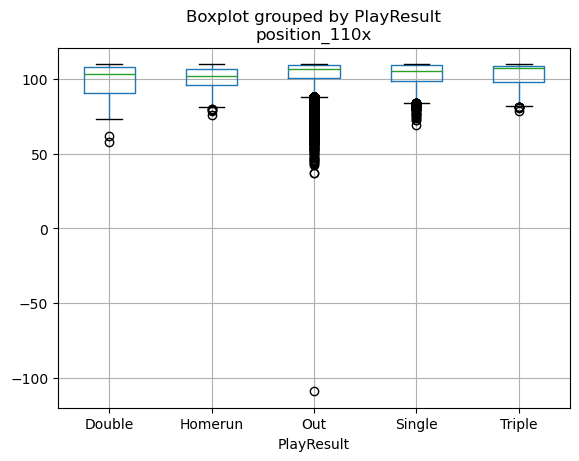

In [61]:
df.boxplot(column='position_110x', by='PlayResult')

<Axes: title={'center': 'position_110y'}, xlabel='PlayResult'>

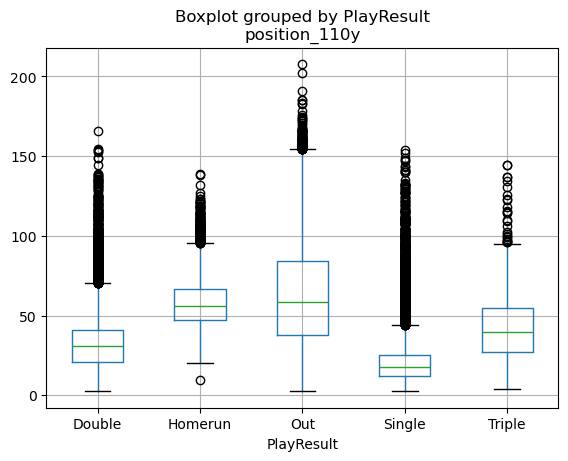

In [62]:
df.boxplot(column='position_110y', by='PlayResult')

<Axes: title={'center': 'position_110z'}, xlabel='PlayResult'>

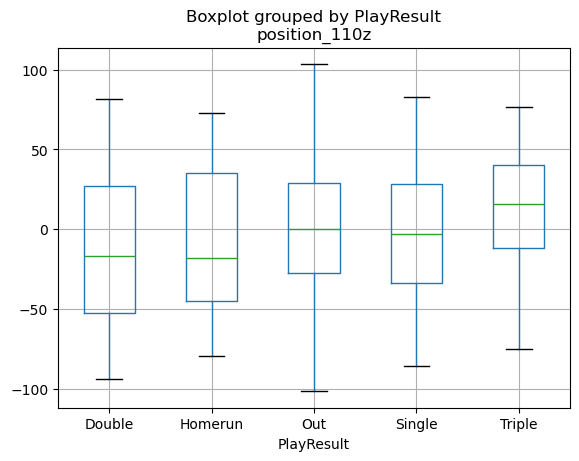

In [63]:
df.boxplot(column='position_110z', by='PlayResult')

In [64]:
# based on the box plots, there does not seem to be much of a correlation with position_110z and PlayResult
col_to_drop = ['position_110z']
df = df.drop(col_to_drop,axis=1)

In [65]:
# similar case imputation
# TODO: based on PlayResult temporarily, change to be based on something else
position_110x_median = df.groupby('PlayResult')['position_110x'].median()
df['position_110x'] = df['position_110x'].fillna(df['PlayResult'].map(position_110x_median))

position_110y_median = df.groupby('PlayResult')['position_110y'].median()
df['position_110y'] = df['position_110y'].fillna(df['PlayResult'].map(position_110y_median))
df.iloc[:,30:].describe(include="all")

,PlateLocSide,zone_time,EffectiveVelo,SpeedDrop,position_110x,position_110y,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,236572.000000,236572.000000,236572.000000,236572.000000,237882.000000,237882.000000,236572.000000,236572.000000,236572.000000,236572.0,236572.000000,236572.000000,236572.000000,236572.000000,236572.000000,236572.000000,236572.000000
mean,2.347247,0.451451,83.962923,7.503295,104.560598,47.338845,-1.747286,5.410116,-0.698013,50.0,5.593169,2.340573,-123.515419,-3.020269,-3.101002,25.954782,-23.196371
std,0.594846,0.034106,6.005028,1.070020,5.355211,25.386445,6.669564,4.727922,1.563963,0.0,0.498851,5.105113,8.338772,2.740734,10.427646,4.111880,7.674767
min,-5.160000,0.370000,35.930000,1.970000,-109.020000,2.420000,-25.740000,-25.180000,-8.460000,50.0,0.640000,-17.360000,-148.250000,-13.880000,-35.560000,4.470000,-74.600000
25%,1.950000,0.420000,79.510000,6.760000,105.320000,21.620000,-7.470000,2.110000,-1.750000,50.0,5.330000,-1.140000,-130.020000,-4.950000,-12.030000,22.960000,-29.200000
50%,2.350000,0.440000,85.010000,7.520000,106.390000,58.315000,-3.020000,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.670000,26.010000,-22.490000
75%,2.740000,0.470000,88.640000,8.240000,106.390000,58.315000,3.980000,9.200000,0.530000,50.0,5.910000,5.960000,-117.370000,-1.200000,5.530000,28.910000,-16.850000
max,19.430000,1.050000,101.920000,13.970000,110.000000,207.730000,20.820000,31.680000,7.370000,50.0,8.920000,17.260000,-60.190000,26.400000,30.950000,48.790000,24.080000


In [66]:
df.isna().sum()

PitchNo                0
Inning                 0
inning_half            0
PAofInning             0
PitchofPA              0
PitcherThrows          0
BatterSide             0
PitchCall              0
PlayResult             0
OutsOnPlay             0
RunsScored             0
Balls                  0
Strikes                0
Outs                   0
TaggedPitchType      560
RelSpeed            1310
SpinRate            1322
SpinAxis            2906
Tilt                2906
InducedVertBreak    2906
VertBreak           2906
HorzBreak           2906
VertApprAngle       1310
HorzApprAngle       1310
vert_rel_angle      1310
horz_rel_angle      1310
RelHeight           1310
RelSide             1310
Extension           1388
PlateLocHeight      1310
PlateLocSide        1310
zone_time           1310
EffectiveVelo       1310
SpeedDrop           1310
position_110x          0
position_110y          0
pfxx                1310
pfxz                1310
x0                  1310
y0                  1310


In [67]:
# a lot of columns have a thousand or so null values, we can just drop them as
# the dataset is so large

# dropping all rows with NA values
df = df.dropna()
df.shape

(234894, 47)

In [68]:
df.iloc[:,:10].describe(include="all")

,PitchNo,Inning,inning_half,PAofInning,PitchofPA,PitcherThrows,BatterSide,PitchCall,PlayResult,OutsOnPlay
count,234894.000000,234894.000000,234894,234894.00000,234894.000000,234894,234894,234894,234894,234894.000000
unique,NaN,NaN,2,NaN,NaN,2,2,3,5,NaN
top,NaN,NaN,Bottom,NaN,NaN,R,R,InPlay,Out,NaN
freq,NaN,NaN,118889,NaN,NaN,173735,151583,234891,144543,NaN
mean,155.618360,4.787836,NaN,3.13349,3.292149,NaN,NaN,NaN,NaN,0.649123
std,93.262086,2.524672,NaN,1.96493,1.793475,NaN,NaN,NaN,NaN,0.532015
min,1.000000,1.000000,NaN,1.00000,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,78.000000,3.000000,NaN,2.00000,2.000000,NaN,NaN,NaN,NaN,0.000000
50%,151.000000,5.000000,NaN,3.00000,3.000000,NaN,NaN,NaN,NaN,1.000000
75%,228.000000,7.000000,NaN,4.00000,5.000000,NaN,NaN,NaN,NaN,1.000000


In [69]:
df.iloc[:,30:].describe(include="all")

,PlateLocSide,zone_time,EffectiveVelo,SpeedDrop,position_110x,position_110y,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.0,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000
mean,2.346384,0.451404,83.968277,7.506249,104.553547,47.355658,-1.740676,5.406267,-0.696042,50.0,5.592473,2.335070,-123.525184,-3.019549,-3.090217,25.966065,-23.198978
std,0.576860,0.033851,5.993986,1.067203,5.367713,25.430839,6.668345,4.716523,1.564015,0.0,0.499035,5.107173,8.324060,2.728764,10.427870,4.102579,7.665538
min,-5.160000,0.370000,52.130000,1.970000,-109.020000,2.420000,-17.380000,-25.180000,-5.050000,50.0,0.640000,-17.360000,-148.250000,-13.800000,-27.000000,8.660000,-74.600000
25%,1.950000,0.420000,79.520000,6.760000,105.290000,21.630000,-7.470000,2.110000,-1.750000,50.0,5.330000,-1.160000,-130.030000,-4.950000,-12.030000,22.970000,-29.200000
50%,2.350000,0.440000,85.010000,7.520000,106.390000,58.315000,-3.020000,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.660000,26.020000,-22.480000
75%,2.740000,0.470000,88.640000,8.250000,106.390000,58.315000,3.990000,9.190000,0.540000,50.0,5.910000,5.960000,-117.380000,-1.200000,5.550000,28.910000,-16.850000
max,5.210000,0.720000,101.920000,13.970000,110.000000,207.730000,16.950000,31.680000,7.370000,50.0,8.920000,17.260000,-79.770000,11.540000,26.240000,48.790000,19.130000


In [70]:
# one hot encode categorical columns
# TODO: Delete extra columns created (scroll to the side to see them lol)
# we are predicting PlayResult, so we are not one-hot encoding it
# drop first so One-hot encoding with n−1 columns to avoid multicollinearity
cols_to_encode = ['inning_half', 'PitcherThrows', 'BatterSide', 'PitchCall']
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
df

,PitchNo,Inning,PAofInning,PitchofPA,PlayResult,OutsOnPlay,RunsScored,Balls,Strikes,Outs,...,vy0,vz0,ax0,ay0,az0,inning_half_Top,PitcherThrows_R,BatterSide_R,PitchCall_InPlay,PitchCall_StrikeSwinging
8,188,6,3,3,Single,0,0,0,2,2,...,-119.68,-1.42,3.66,30.82,-31.28,1,1,1,1,0
23,100,3,3,3,Out,1,0,0,2,1,...,-120.78,-2.24,11.69,25.80,-21.30,0,0,1,1,0
32,138,5,3,3,Single,0,1,0,2,0,...,-124.67,-1.86,-15.14,25.86,-22.02,1,1,0,1,0
33,232,7,5,3,Double,0,2,1,1,2,...,-106.90,0.93,9.91,23.16,-30.77,1,1,0,1,0
35,182,5,6,6,Single,0,1,3,2,2,...,-134.16,-3.67,-10.85,28.39,-32.01,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513395,109,3,6,4,Single,1,1,2,1,2,...,-120.40,-1.70,1.80,21.03,-22.90,0,1,1,1,0
1513398,54,2,1,6,Out,1,0,3,2,0,...,-119.45,-3.77,-0.46,26.82,-30.56,0,0,1,1,0
1513407,103,3,4,4,Single,0,0,1,2,2,...,-122.47,-4.56,14.20,22.05,-25.01,0,0,1,1,0
1513408,94,3,2,2,Out,1,0,0,1,0,...,-117.74,-4.57,1.94,23.96,-30.12,0,0,1,1,0


In [71]:
# import seaborn as sb

# # analyze subset of pitch location versus play result
# df_pitch_loc = df[['x0', 'y0', 'z0', 'PlayResult']]


# # create the pair plot
# sb.pairplot(df_pitch_loc.dropna(), hue='PlayResult')

In [72]:
# column y0 has the same value for every pitch (50.0 feet is the standard release point), so it can be dropped
df = df.drop(['y0'], axis=1)

In [73]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import KernelPCA
# df.dropna(subset=['x0', 'z0', 'PlayResult'], inplace=True)
# # Stack x0 and z0 into a feature matrix
# X = np.vstack((df['x0'], df['z0'])).T

# # Apply a kernel transformation
# kpca = KernelPCA(kernel="rbf", gamma=0.5)  # Radial basis function kernel
# X_kpca = kpca.fit_transform(X)

# # assign colors
# result_colors = {"Single": "green", "Out": "red", "Double": "blue", "Homerun": "yellow", "Triple": "black" }
# colors = [result_colors[result] for result in df['PlayResult']]

# # Plot the transformed data
# plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=colors, alpha=0.7)
# plt.title("Kernel PCA on x0 vs. z0")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

In [74]:
# # Try linear kernel transformation function
# # Stack x0 and z0 into a feature matrix
# X = np.vstack((df['x0'], df['z0'])).T

# # Apply a kernel transformation
# kpca = KernelPCA(kernel="linear")  # Radial basis function kernel
# X_kpca = kpca.fit_transform(X)

# # assign colors
# result_colors = {"Single": "green", "Out": "red", "Double": "blue", "Homerun": "yellow", "Triple": "black" }
# colors = [result_colors[result] for result in df['PlayResult']]

# # Plot the transformed data
# plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=colors, alpha=0.7)
# plt.title("Kernel PCA on x0 vs. z0")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

In [75]:
# # analyzing pair of pfxx and pfxz for horizontal and vertical movement
# # analyze subset of pitch location versus play result
# df_pitch_movement = df[['pfxx', 'pfxz', 'PlayResult']]


# # create the pair plot
# sb.pairplot(df_pitch_movement.dropna(), hue='PlayResult')

In [76]:
# # Stack x0 and z0 into a feature matrix
# X = np.vstack((df['pfxx'], df['pfxz'])).T

# # Apply a kernel transformation
# kpca = KernelPCA(kernel="rbf")  # Radial basis function kernel
# X_kpca = kpca.fit_transform(X)

# # assign colors
# result_colors = {"Single": "green", "Out": "red", "Double": "blue", "Homerun": "yellow", "Triple": "black" }
# colors = [result_colors[result] for result in df['PlayResult']]

# # Plot the transformed data
# plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=colors, alpha=0.7)
# plt.title("Kernel PCA on pfxx vs. pfxz")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

In [77]:
df['PlayResult'].value_counts()

Out        144543
Single      59509
Double      17617
Homerun     11378
Triple       1847
Name: PlayResult, dtype: int64

# Data Exploration

## Histograms of Numerical Features

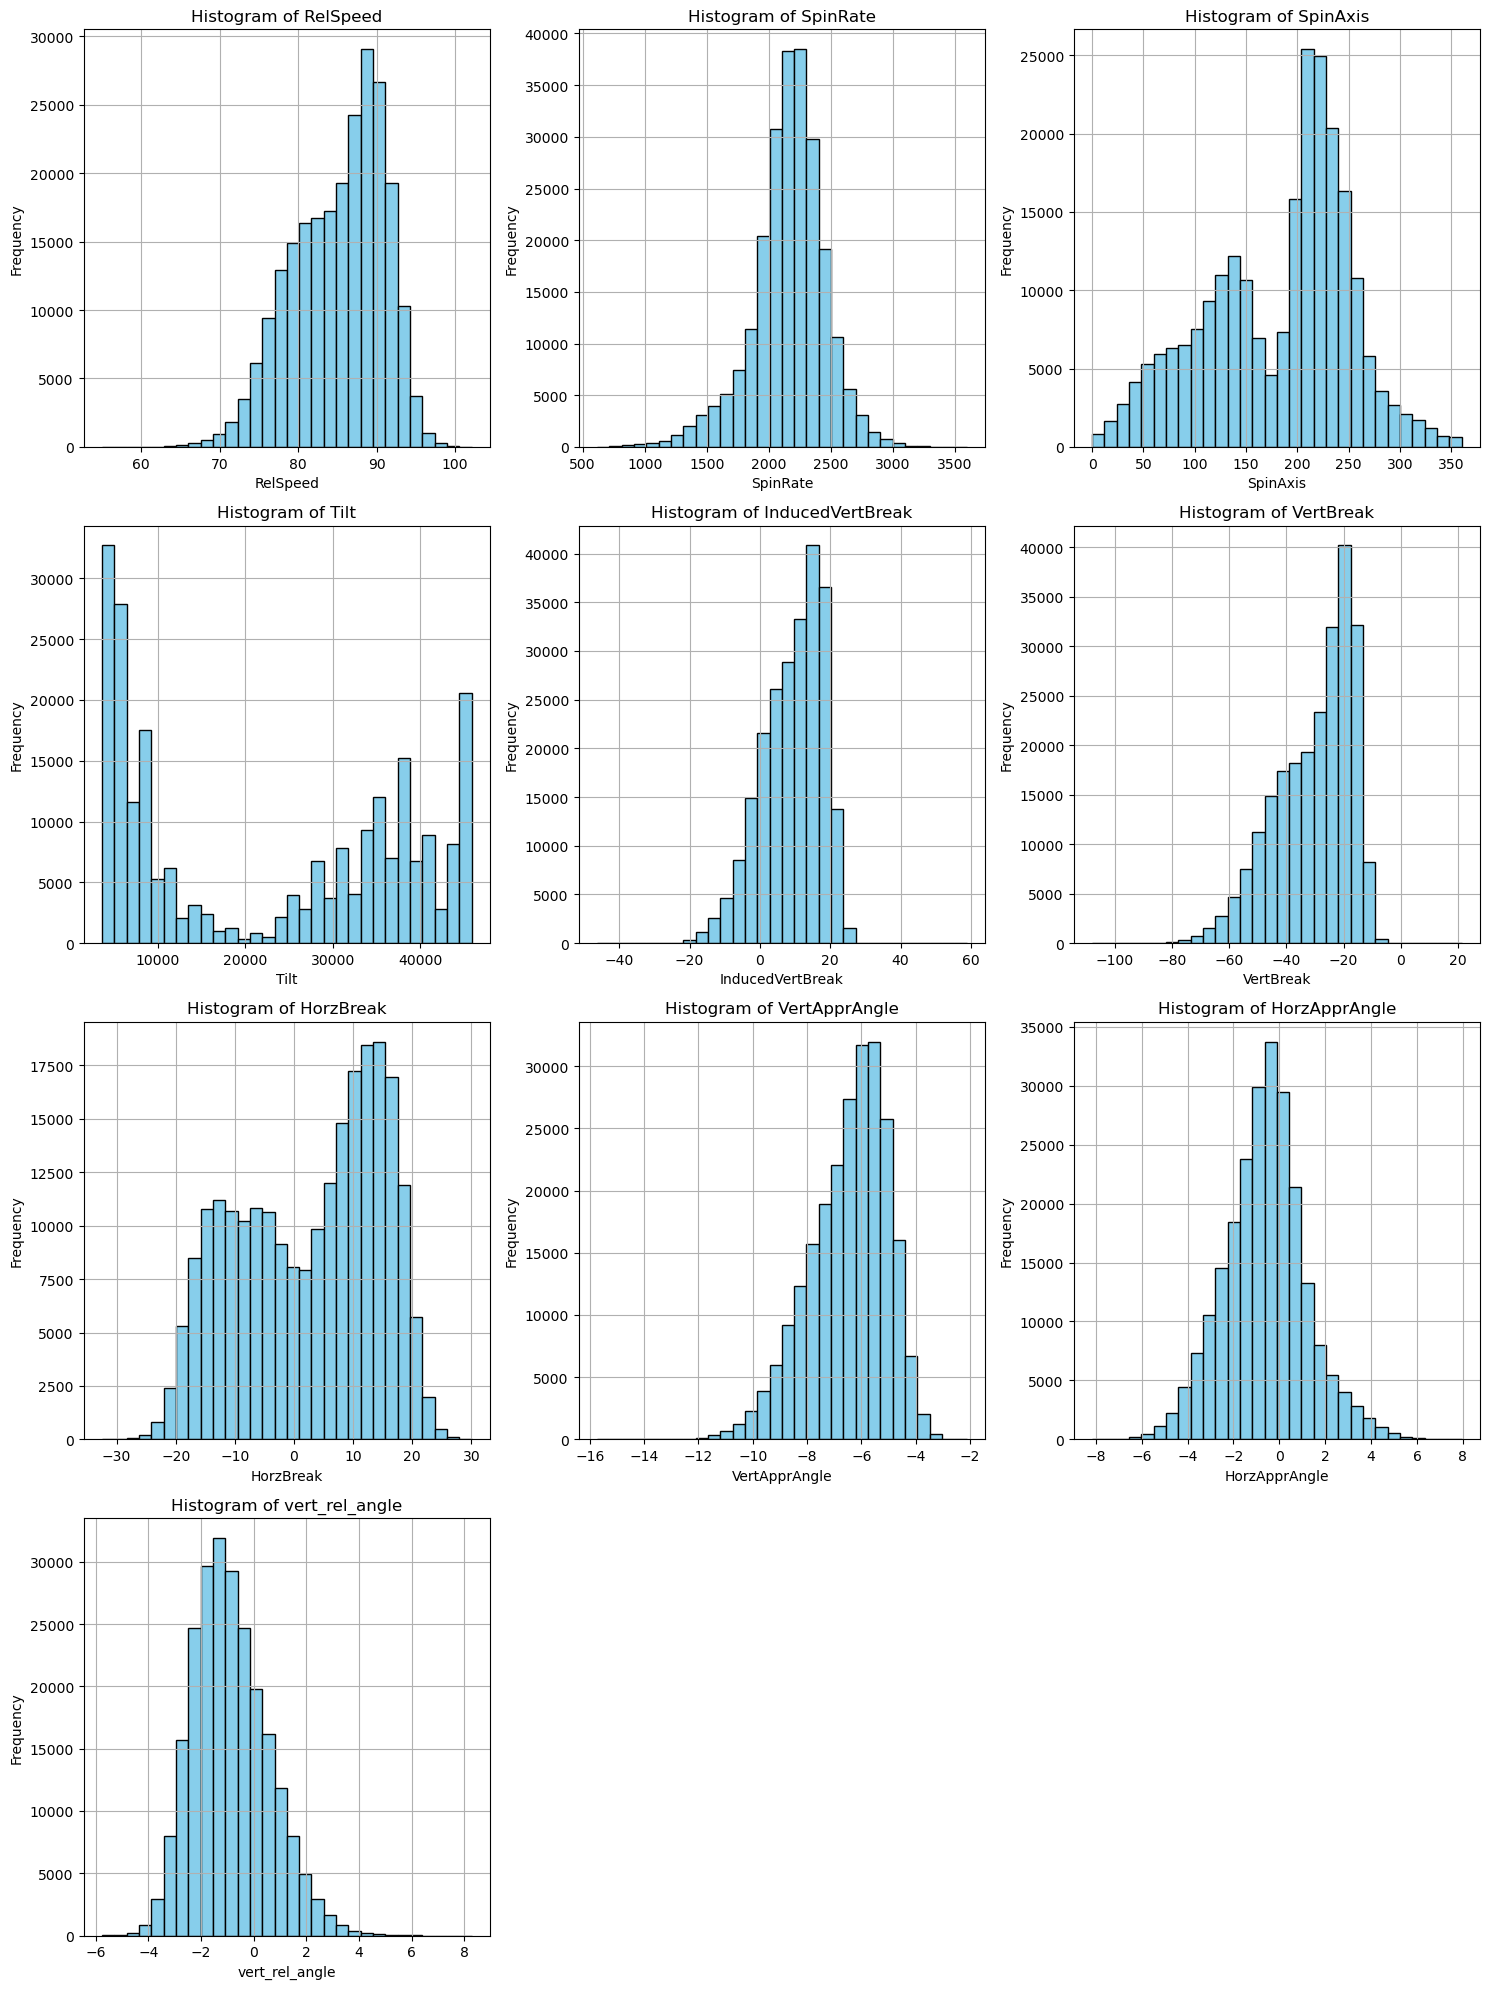

In [78]:
from matplotlib import pyplot as plt
# List of columns to plot
columns = [
    'RelSpeed', 'SpinRate', 'SpinAxis', 'Tilt', 'InducedVertBreak', 
    'VertBreak', 'HorzBreak', 'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle'
]

# Set the number of subplots (rows and columns)
num_cols = 3  # Number of columns in the grid
num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each column
for i, col in enumerate(columns):
    if col in df.columns:
        df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].axis('off')  # Hide the subplot if no data

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


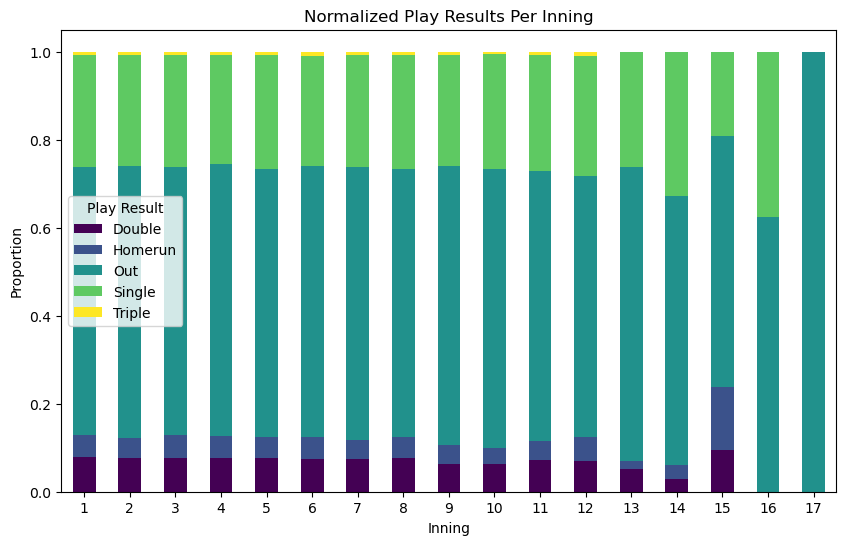

In [79]:
# analyzing relationship between PlayResult and Inning Number
# Count play results per inning
play_results_per_inning = df.groupby(['Inning', 'PlayResult']).size().reset_index(name='count')

# Pivot for easier manipulation
pivot_table = play_results_per_inning.pivot(index='Inning', columns='PlayResult', values='count').fillna(0)

# Normalize by row totals (each inning)
normalized_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plotting
normalized_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Normalized Play Results Per Inning')
plt.xlabel('Inning')
plt.ylabel('Proportion')
plt.legend(title='Play Result')
plt.xticks(rotation=0)
plt.show()

# Feature Engineering

## Creating New Features

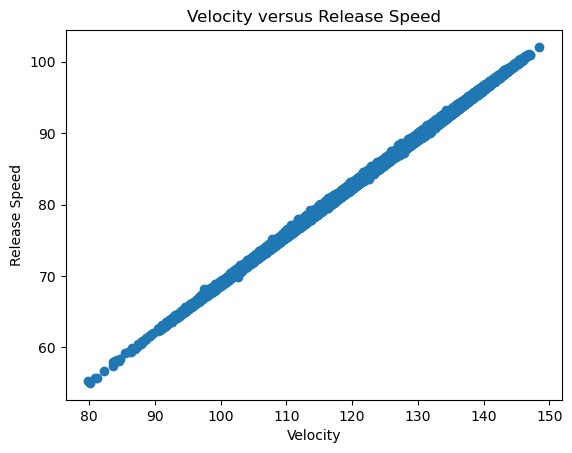

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# creating velocity using all three velocity components: vx0, vy0, vz0
df.dropna(subset=['vx0', 'vy0', 'vz0'], inplace=True)
df['velocity'] = np.sqrt(df['vx0']**2 + df['vy0']**2 + df['vz0']**2)

# plot versus RelSpeed
plt.scatter(df['velocity'], df['RelSpeed'])
plt.title("Velocity versus Release Speed")
plt.xlabel("Velocity")
plt.ylabel("Release Speed")
plt.show()

In [82]:
# velocity and release speed are highly correlated, so we can drop release speed because velocity is more helpful to know
# the speed of the ball when it is about to be hit by the batter
cols_to_drop = ['RelSpeed', 'vx0', 'vy0', 'vz0']
df = df.drop(cols_to_drop,axis=1)

In [83]:
import numpy as np
# create acceleration using all three acceleration components: ax0, ay0, az0
df.dropna(subset=['ax0', 'ay0', 'az0'], inplace=True)
df['acceleration'] = np.sqrt(df['ax0']**2 + df['ay0']**2 + df['az0']**2)

cols_to_drop = ['ax0', 'ay0', 'az0']
df = df.drop(cols_to_drop,axis=1)

In [84]:
# creating total break magnitude to combine vertical and horizontal break
# looking at the histogram for VertBreak versus InducedVertBreak, we chose to use VertBreak in our calculations
# because HorzBreak and VertBreak are calculated as unaffected by gravity, while InducedVertBreak is calculated
# as affected by gravity. Also, the scale of VertBreak ranges negative values, specifically from -80 to 0
df.dropna(subset=['VertBreak', 'HorzBreak'], inplace=True)
df['TotalBreak'] = np.sqrt(df['VertBreak']**2 + df['HorzBreak']**2)

cols_to_drop = ['InducedVertBreak', 'VertBreak', 'HorzBreak']
df = df.drop(cols_to_drop,axis=1)

In [85]:
# combine all fastball pitch types
pitch_type_map = {'Four-Seam': 'Fastball',
                  'FourSeamFastBall': 'Fastball',
                  'TwoSeamFastBall': 'Fastball',
                  'OneSeamFastBall': 'Fastball',
                  'Cutter': 'Fastball',
                  'Sinker': 'Fastball',
                  'Curveball': 'Breaking Ball',
                  'Slider': 'Breaking Ball',
                  'ChangeUp': 'Off-Speed',
                  'Changeup': 'Off-Speed',
                  'Splitter': 'Off-Speed',
                  'Knuckleball': 'Off-Speed' }
df['CondensedPitchType'] = df['TaggedPitchType'].map(pitch_type_map)

cols_to_drop = ['TaggedPitchType']
df = df.drop(cols_to_drop,axis=1)

In [86]:
# one-hot encode CondensedPitchType
cols_to_encode = ['CondensedPitchType']
df = pd.get_dummies(df, columns=cols_to_encode)
df

,PitchNo,Inning,PAofInning,PitchofPA,PlayResult,OutsOnPlay,RunsScored,Balls,Strikes,Outs,...,PitcherThrows_R,BatterSide_R,PitchCall_InPlay,PitchCall_StrikeSwinging,velocity,acceleration,TotalBreak,CondensedPitchType_Breaking Ball,CondensedPitchType_Fastball,CondensedPitchType_Off-Speed
8,188,6,3,3,Single,0,0,0,2,2,...,1,1,1,0,119.713089,44.064798,42.583510,1,0,0
23,100,3,3,3,Out,1,0,0,2,1,...,0,1,1,0,121.043387,35.439894,30.167242,0,0,0
32,138,5,3,3,Single,0,1,0,2,0,...,1,0,1,0,124.808673,37.186551,31.292045,0,0,1
33,232,7,5,3,Double,0,2,1,1,2,...,1,0,1,0,106.918532,39.766652,53.420023,1,0,0
35,182,5,6,6,Single,0,1,3,2,2,...,1,0,1,0,134.252743,44.140171,35.702674,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513395,109,3,6,4,Single,1,1,2,1,2,...,1,1,1,0,120.782252,31.143393,29.916492,1,0,0
1513398,54,2,1,6,Out,1,0,3,2,0,...,0,1,1,0,119.680723,40.662484,42.953688,1,0,0
1513407,103,3,4,4,Single,0,0,1,2,2,...,0,1,1,0,122.820930,36.240069,36.001694,0,0,1
1513408,94,3,2,2,Out,1,0,0,1,0,...,0,1,1,0,118.207001,38.536471,42.810005,1,0,0


## Dimensionality Reduction

In [87]:
print(df.shape)
df['PlayResult'].unique()

(234894, 42)


array(['Single', 'Out', 'Double', 'Homerun', 'Triple'], dtype=object)

In [88]:
# more data visualization
df.columns

Index(['PitchNo', 'Inning', 'PAofInning', 'PitchofPA', 'PlayResult',
       'OutsOnPlay', 'RunsScored', 'Balls', 'Strikes', 'Outs', 'SpinRate',
       'SpinAxis', 'Tilt', 'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle',
       'horz_rel_angle', 'RelHeight', 'RelSide', 'Extension', 'PlateLocHeight',
       'PlateLocSide', 'zone_time', 'EffectiveVelo', 'SpeedDrop',
       'position_110x', 'position_110y', 'pfxx', 'pfxz', 'x0', 'z0',
       'inning_half_Top', 'PitcherThrows_R', 'BatterSide_R',
       'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 'velocity',
       'acceleration', 'TotalBreak', 'CondensedPitchType_Breaking Ball',
       'CondensedPitchType_Fastball', 'CondensedPitchType_Off-Speed'],
      dtype='object')

In [89]:
# mapping play result strings to numbers so we can predict using model
play_result_map = {'Out': 0,
                'Single': 1,
                  'Double': 2,
                  'Triple': 3,
                  'Homerun': 4 }
df['PlayResult'] = df['PlayResult'].map(play_result_map)

In [90]:
df.isna().sum()

# SpinAxis, Extension, 

PitchNo                             0
Inning                              0
PAofInning                          0
PitchofPA                           0
PlayResult                          0
OutsOnPlay                          0
RunsScored                          0
Balls                               0
Strikes                             0
Outs                                0
SpinRate                            0
SpinAxis                            0
Tilt                                0
VertApprAngle                       0
HorzApprAngle                       0
vert_rel_angle                      0
horz_rel_angle                      0
RelHeight                           0
RelSide                             0
Extension                           0
PlateLocHeight                      0
PlateLocSide                        0
zone_time                           0
EffectiveVelo                       0
SpeedDrop                           0
position_110x                       0
position_110

In [91]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


data_Y = df['PlayResult'].values.ravel()

data_X = df.drop(['PlayResult'], axis = 1)

#TODO: WE SHOULD NOT HAVE SCALED, DATA LEAKAGE!!!
# print("original shape", data_X.shape)
# #columns that have been one hot encoded: 

# ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 'CondensedPitchType_Off-Speed']

# # don't want to scale one hot encoded/categorical stuff, separate out and join back after scaling
# df_ohe = data_X[ohe_cols]

# df_numeric = data_X.drop(ohe_cols, axis = 1)

# df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


# df_scaled.head()

# # Ensure index is reset for ohe
# df_ohe = df_ohe.reset_index(drop=True)

# # Data X is now SCALED!

# data_X = pd.concat([df_scaled, df_ohe], axis=1)
# print("after scaling shape", data_X.shape)

# Model Training

In [92]:
#Imports 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [93]:
# Train a Decision Tree

# 80-20 split
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, 
    test_size=0.20, random_state=5)


print("# train set records:", x_train.shape[0])
print("# test set records:", x_test.shape[0])

# train set records: 187915
# test set records: 46979


In [94]:
print("Variation: entropy")

dt_clf = DecisionTreeClassifier(criterion="entropy") # create classifier
dt_clf = dt_clf.fit(x_train, y_train) # fit it to data
preds = dt_clf.predict(x_test) # predict on holdout/test data
print('Accuracy on test data is:', (accuracy_score(y_test, preds)))   # print acc

Variation: entropy
Accuracy on test data is: 0.9269886545052044


In [95]:
# Decision Tree Grid Search to find best params and accuracy
from sklearn.model_selection import GridSearchCV


# Try max_depth values and min_samples_leaf of 5,10,15,20
# Try max_features values of 5,10,15
params = {"max_depth": [5,10,15,20] , 
         "min_samples_leaf": [5,10,15,20], 
         "max_features": [5,10,15]}

# doing inner loop of cross validation with manually separated "training set"

# Create the GridSearchCV object:
# Pass in DT classifier, testing parameters, 5 folds, and accuracy scoring criteria
grid_search = GridSearchCV(dt_clf, params, cv=5, scoring='accuracy')

# fit to data
grid_search.fit(x_train, y_train)

# best parameters found
print("Best Params", grid_search.best_params_)
# What was the accuracy at this best max_depth?
print("Accuracy:", grid_search.best_score_ * 100)

Best Params {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 20}
Accuracy: 94.06167682196738


In [96]:
# Nested cross validation for Decision Tree clf (TAKES LONG)

#TODO: cv we changed from 10 to 5 to try to shorten it, revisit later
nested_score = cross_val_score(grid_search, data_X, data_Y, cv=5)

print("Accuracy:", nested_score.mean()*100)

Accuracy: 93.77123380770274


In [97]:
# Decision Tree Model Evaluation: Confusion Matrix + Classification Report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# get the predictions with best estimator from grid search
pred_Y = cross_val_predict(grid_search.best_estimator_, data_X, data_Y, cv=10)


print(confusion_matrix(data_Y, pred_Y))
print(classification_report(data_Y, pred_Y))

[[144430     68     38      0      7]
 [   541  54520   4092     13    343]
 [   259   4922  11259     36   1141]
 [    19    453   1010     58    307]
 [     9    131    667     12  10559]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    144543
           1       0.91      0.92      0.91     59509
           2       0.66      0.64      0.65     17617
           3       0.49      0.03      0.06      1847
           4       0.85      0.93      0.89     11378

    accuracy                           0.94    234894
   macro avg       0.78      0.70      0.70    234894
weighted avg       0.94      0.94      0.94    234894



In [ ]:
# Trying Naive Bayes mode
## Doing PCA for Naive Bayes because of curse of dimensionality

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

clf = GaussianNB()
pca = PCA()
scaler = StandardScaler()

# Columns that have been one hot encoded (don't need scaling)
ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
    'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
    'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
    'CondensedPitchType_Off-Speed']

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

# ignore ohe_cols and scale rest
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),  # Apply StandardScaler only to numeric columns
        ('ohe', 'passthrough', ohe_cols)          # Leave OHE columns as is
    ])

# Pipeline with the preprocessor and classifier (or regressor)
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('clf', clf)  # Gaussian NB Classifier
])

# Using Gaussian NB Classifier

pipe = Pipeline([ ('clf', clf)])

scores = cross_val_score(pipe, data_X, data_Y, cv=10) 

print("Accuracy:", scores.mean()*100)

# get the predictions with best estimator from grid search
pred_Y = cross_val_predict(clf, data_X, data_Y, cv=10)


print(confusion_matrix(data_Y, pred_Y))
print(classification_report(data_Y, pred_Y))

Accuracy: 89.50845930056008
[[141275   1800   1157    154    157]
 [  2018  54260   2824     13    394]
 [  2193   8181   5921     18   1304]
 [   561    551    398      3    334]
 [   827    355   1401      4   8791]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    144543
           1       0.83      0.91      0.87     59509
           2       0.51      0.34      0.40     17617
           3       0.02      0.00      0.00      1847
           4       0.80      0.77      0.79     11378

    accuracy                           0.90    234894
   macro avg       0.62      0.60      0.61    234894
weighted avg       0.88      0.90      0.89    234894



In [ ]:
# Testing KNN Model 

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


# creating a standard scaler
scaler = StandardScaler()
pca = PCA()

# knn classifier with 7 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=7)


# Columns that have been one hot encoded (don't need scaling)
ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
    'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
    'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
    'CondensedPitchType_Off-Speed']

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

# Use a ColumnTransformer to ignore ohe_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),  
        ('ohe', 'passthrough', ohe_cols)
    ])

pipe = Pipeline([('preprocessor', preprocessor), 
                    ('pca', pca), 
                    ('knn_clf', knn_clf)])

param_grid = {
    'pca__n_components': list(range(5, 21)), # checking [5,20] (inclusive)
    'knn_clf__n_neighbors': list(range(10, 101, 10)) # checking 10-100 
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# TODO: pretty sure we don't need it cross_val score will fit the model based on folds
# grid_search.fit(x_train, y_train)

scores = cross_val_score(grid_search, data_X, data_Y, cv=5) 

print("Accuracy:", scores.mean() * 100)

# get the predictions with best estimator from grid search
pred_Y = cross_val_predict(grid_search, data_X, data_Y, cv=10)


print(confusion_matrix(data_Y, pred_Y))
print(classification_report(data_Y, pred_Y))

In [106]:
print("DataFrame columns:", data_X.columns)
print("Numeric columns:", numeric_cols)
print("One-hot encoded columns:", ohe_cols)

DataFrame columns: Index(['PitchNo', 'Inning', 'PAofInning', 'PitchofPA', 'OutsOnPlay',
       'RunsScored', 'Balls', 'Strikes', 'Outs', 'SpinRate', 'SpinAxis',
       'Tilt', 'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle',
       'horz_rel_angle', 'RelHeight', 'RelSide', 'Extension', 'PlateLocHeight',
       'PlateLocSide', 'zone_time', 'EffectiveVelo', 'SpeedDrop',
       'position_110x', 'position_110y', 'pfxx', 'pfxz', 'x0', 'z0',
       'inning_half_Top', 'PitcherThrows_R', 'BatterSide_R',
       'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 'velocity',
       'acceleration', 'TotalBreak', 'CondensedPitchType_Breaking Ball',
       'CondensedPitchType_Fastball', 'CondensedPitchType_Off-Speed'],
      dtype='object')
Numeric columns: ['PitchNo', 'Inning', 'PAofInning', 'PitchofPA', 'OutsOnPlay', 'RunsScored', 'Balls', 'Strikes', 'Outs', 'SpinRate', 'SpinAxis', 'Tilt', 'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle', 'horz_rel_angle', 'RelHeight', 'RelSide', 'Extension', 'P

In [ ]:
# Trying SVM Model

# your code goes here
from sklearn.svm import SVC

# creating a standard scaler
scaler = StandardScaler()
pca = PCA()

# SVM classifier
svc_clf = SVC()


# Columns that have been one hot encoded (don't need scaling)
ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
    'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
    'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
    'CondensedPitchType_Off-Speed']

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

# Use a ColumnTransformer to ignore ohe_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),  
        ('ohe', 'passthrough', ohe_cols)
    ])

pipe = Pipeline([('preprocessor', preprocessor), ('pca', pca), ('clf', svc_clf)])

param_grid = {
    'pca__n_components': list(range(5, 20)), # test 5 through 19 inclusive
    'clf__kernel': ['linear', 'rbf', 'poly']
}


grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

pred_Y = cross_val_predict(grid_search, data_X, data_Y, cv=10)

print(classification_report(data_Y, pred_Y))

print('Accuracy on test data is:', (accuracy_score(data_Y, pred_Y)))   


# get the predictions with best estimator from grid search
pred_Y = cross_val_predict(grid_search.best_estimator_, data_X, data_Y, cv=10)


print(confusion_matrix(data_Y, pred_Y))
print(classification_report(data_Y, pred_Y))

KeyboardInterrupt: 

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier


# neural net
nn_clf = MLPClassifier()


# Columns that have been one hot encoded (don't need scaling)
ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
    'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
    'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
    'CondensedPitchType_Off-Speed']

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

# Use a ColumnTransformer to ignore ohe_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),  
        ('ohe', 'passthrough', ohe_cols)
    ])


pipe = Pipeline([('preprocessor', preprocessor), ('clf', nn_clf)])

param_grid = {
    'clf__hidden_layer_sizes': list(range(30, 71, 10)), #includes 70
    'clf__activation': ['logistic', 'tanh', 'relu', 'softmax']
}


grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

#print accuracy
scores = cross_val_score(grid_search, data_X, data_Y, cv=5) 
print("Accuracy:", scores.mean()*100)

### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier


# random forest
rf_clf = RandomForestClassifier()


param_grid = {
    'max_depth': list(range(35, 46)), #[35,45] inclusive
    'min_samples_leaf': [100, 500, 1000, 2000],
    'max_features': ['sqrt', 'log2']
}


grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

# cross validation and report accuracy
scores = cross_val_score(grid_search, data_X, data_Y, cv=5) 
print("Accuracy:", scores.mean()*100)


In [ ]:
# Ensemble, Descision Stumps

from sklearn.ensemble import AdaBoostClassifier

# ensemble AdaBoost, 150 base classifiers, decision stump
# TODO: diff number of base classifiers
ensemble_clf = AdaBoostClassifier(n_estimators=150)

# find the accuracy
scores = cross_val_score(ensemble_clf, data_X, data_Y, cv=5) 
print("Accuracy:", scores.mean()*100)


Accuracy: 87.78556617125422
